In [1]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 73.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of flask to determine which version is compatible with other requirements. This could take a while.
     ━━━

In [1]:
!pip install git+https://github.com/pycaret/pycaret.git@master

  Cloning https://github.com/pycaret/pycaret.git (to revision master) to /tmp/pip-req-build-xqvcmfh2
  Running command git clone --filter=blob:none --quiet https://github.com/pycaret/pycaret.git /tmp/pip-req-build-xqvcmfh2
  Resolved https://github.com/pycaret/pycaret.git to commit 58ec3c282d58e94727f9d5b77b49f241e9103ab3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.2/460.2 kB 26.5 MB/s eta 0:00:00
  Created wheel for pycaret: filename=pycaret-3.4.0-py3-none-any.whl size=491177 sha256=19c982f9fdab70543ab84846a1a90ef4156449c824897da4fbbb075acbd89990
  Stored in directory: /tm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression, SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from catboost import CatBoostClassifier

import shap
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error, mean_squared_log_error, root_mean_squared_log_error, mean_absolute_percentage_error, median_absolute_error, max_error

In [2]:
import pycaret
# init setup
from pycaret.regression import *

In [3]:
xgboost_model = load_model('optim_30_iter_bayesian_OXID_POT_xgboost')
xgboost_model

Transformation Pipeline and Model Successfully Loaded


AttributeError: 'XGBModel' object has no attribute 'feature_weights'

AttributeError: 'XGBModel' object has no attribute 'feature_weights'

AttributeError: 'XGBModel' object has no attribute 'feature_weights'

In [4]:
xgboost_model = xgboost_model[-1]
xgboost_model

AttributeError: 'XGBModel' object has no attribute 'feature_weights'

AttributeError: 'XGBModel' object has no attribute 'feature_weights'

AttributeError: 'XGBModel' object has no attribute 'feature_weights'

In [5]:
df = pd.read_csv('ESW_training_dataset.csv')
df

,ICSD_id,formula,ESW_Red (V),ESW_Oxi (V),ESW Width (V),composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,...,5-norm,7-norm,10-norm,compound possible,max ionic char,avg ionic char,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons
0,184904.0,LiF,0.000,7.120000,7.120000,Li1 F1,3.0,9.0,6.0,6.000000,...,0.574349,0.552045,0.535887,True,0.894601,0.223650,0.375000,0.625000,0.000000,0.000000
1,152948.0,LiLuF4,0.300,7.120117,6.820117,Li1 Lu1 F4,3.0,71.0,68.0,18.333333,...,0.666927,0.666678,0.666667,True,0.894601,0.193372,0.239130,0.434783,0.021739,0.304348
2,27896.0,LiYF4,0.400,7.169922,6.769922,Li1 Y1 F4,3.0,39.0,36.0,13.000000,...,0.666927,0.666678,0.666667,True,0.894601,0.194363,0.343750,0.625000,0.031250,0.000000
3,415135.0,Li3ScF6,0.585,7.200000,6.615000,Li3 Sc1 F6,3.0,21.0,18.0,8.400000,...,0.603719,0.600668,0.600059,True,0.894601,0.211306,0.354167,0.625000,0.020833,0.000000
4,245516.0,Li2Si3O7,1.320,7.900000,6.580000,Li2 Si3 O7,3.0,14.0,11.0,8.666667,...,0.585230,0.583567,0.583346,True,0.779730,0.148981,0.392857,0.607143,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,39566.0,AlCl3,0.000,1.810000,1.810000,Al1 Cl3,13.0,17.0,4.0,16.000000,...,0.750616,0.750049,0.750001,True,0.451531,0.084662,0.333333,0.666667,0.000000,0.000000
1498,29131.0,AlF3,0.000,4.830000,4.830000,Al1 F3,9.0,13.0,4.0,10.000000,...,0.750616,0.750049,0.750001,True,0.754443,0.141458,0.333333,0.666667,0.000000,0.000000
1499,391247.0,AlI3,0.000,0.440000,0.440000,Al1 I3,13.0,53.0,40.0,43.000000,...,0.750616,0.750049,0.750001,True,0.240902,0.045169,0.148148,0.296296,0.555556,0.000000
1500,73220.0,Al2S3,0.000,0.110000,0.110000,Al2 S3,13.0,16.0,3.0,14.800000,...,0.615030,0.604895,0.601032,True,0.209607,0.050306,0.416667,0.583333,0.000000,0.000000


In [6]:
df.columns

Index(['ICSD_id', 'formula', 'ESW_Red (V)', 'ESW_Oxi (V)', 'ESW Width (V)',
       'composition', 'MagpieData minimum Number', 'MagpieData maximum Number',
       'MagpieData range Number', 'MagpieData mean Number',
       ...
       '5-norm', '7-norm', '10-norm', 'compound possible', 'max ionic char',
       'avg ionic char', 'frac s valence electrons',
       'frac p valence electrons', 'frac d valence electrons',
       'frac f valence electrons'],
      dtype='object', length=151)

In [7]:
X = df.drop(['ICSD_id', 'formula', 'ESW_Red (V)', 'ESW_Oxi (V)', 'ESW Width (V)', 'composition'], axis = 1)
y = df['ESW_Oxi (V)']

In [8]:
X

,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,...,5-norm,7-norm,10-norm,compound possible,max ionic char,avg ionic char,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons
0,3.0,9.0,6.0,6.000000,3.000000,3.0,1.0,93.0,92.0,47.000000,...,0.574349,0.552045,0.535887,True,0.894601,0.223650,0.375000,0.625000,0.000000,0.000000
1,3.0,71.0,68.0,18.333333,17.555556,9.0,1.0,93.0,92.0,69.000000,...,0.666927,0.666678,0.666667,True,0.894601,0.193372,0.239130,0.434783,0.021739,0.304348
2,3.0,39.0,36.0,13.000000,8.666667,9.0,1.0,93.0,92.0,64.166667,...,0.666927,0.666678,0.666667,True,0.894601,0.194363,0.343750,0.625000,0.031250,0.000000
3,3.0,21.0,18.0,8.400000,3.240000,9.0,1.0,93.0,92.0,57.200000,...,0.603719,0.600668,0.600059,True,0.894601,0.211306,0.354167,0.625000,0.020833,0.000000
4,3.0,14.0,11.0,8.666667,2.666667,8.0,1.0,87.0,86.0,70.416667,...,0.585230,0.583567,0.583346,True,0.779730,0.148981,0.392857,0.607143,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,13.0,17.0,4.0,16.000000,1.500000,17.0,73.0,94.0,21.0,88.750000,...,0.750616,0.750049,0.750001,True,0.451531,0.084662,0.333333,0.666667,0.000000,0.000000
1498,9.0,13.0,4.0,10.000000,1.500000,9.0,73.0,93.0,20.0,88.000000,...,0.750616,0.750049,0.750001,True,0.754443,0.141458,0.333333,0.666667,0.000000,0.000000
1499,13.0,53.0,40.0,43.000000,15.000000,53.0,73.0,96.0,23.0,90.250000,...,0.750616,0.750049,0.750001,True,0.240902,0.045169,0.148148,0.296296,0.555556,0.000000
1500,13.0,16.0,3.0,14.800000,1.440000,16.0,73.0,88.0,15.0,82.000000,...,0.615030,0.604895,0.601032,True,0.209607,0.050306,0.416667,0.583333,0.000000,0.000000


In [9]:
y

,ESW_Oxi (V)
0,7.120000
1,7.120117
2,7.169922
3,7.200000
4,7.900000
...,...
1497,1.810000
1498,4.830000
1499,0.440000
1500,0.110000


In [10]:
df.columns[0:100]

Index(['ICSD_id', 'formula', 'ESW_Red (V)', 'ESW_Oxi (V)', 'ESW Width (V)',
       'composition', 'MagpieData minimum Number', 'MagpieData maximum Number',
       'MagpieData range Number', 'MagpieData mean Number',
       'MagpieData avg_dev Number', 'MagpieData mode Number',
       'MagpieData minimum MendeleevNumber',
       'MagpieData maximum MendeleevNumber',
       'MagpieData range MendeleevNumber', 'MagpieData mean MendeleevNumber',
       'MagpieData avg_dev MendeleevNumber', 'MagpieData mode MendeleevNumber',
       'MagpieData minimum AtomicWeight', 'MagpieData maximum AtomicWeight',
       'MagpieData range AtomicWeight', 'MagpieData mean AtomicWeight',
       'MagpieData avg_dev AtomicWeight', 'MagpieData mode AtomicWeight',
       'MagpieData minimum MeltingT', 'MagpieData maximum MeltingT',
       'MagpieData range MeltingT', 'MagpieData mean MeltingT',
       'MagpieData avg_dev MeltingT', 'MagpieData mode MeltingT',
       'MagpieData minimum Column', 'MagpieData maxi

In [11]:
df.columns[100:]

Index(['MagpieData avg_dev NdUnfilled', 'MagpieData mode NdUnfilled',
       'MagpieData minimum NfUnfilled', 'MagpieData maximum NfUnfilled',
       'MagpieData range NfUnfilled', 'MagpieData mean NfUnfilled',
       'MagpieData avg_dev NfUnfilled', 'MagpieData mode NfUnfilled',
       'MagpieData minimum NUnfilled', 'MagpieData maximum NUnfilled',
       'MagpieData range NUnfilled', 'MagpieData mean NUnfilled',
       'MagpieData avg_dev NUnfilled', 'MagpieData mode NUnfilled',
       'MagpieData minimum GSvolume_pa', 'MagpieData maximum GSvolume_pa',
       'MagpieData range GSvolume_pa', 'MagpieData mean GSvolume_pa',
       'MagpieData avg_dev GSvolume_pa', 'MagpieData mode GSvolume_pa',
       'MagpieData minimum GSbandgap', 'MagpieData maximum GSbandgap',
       'MagpieData range GSbandgap', 'MagpieData mean GSbandgap',
       'MagpieData avg_dev GSbandgap', 'MagpieData mode GSbandgap',
       'MagpieData minimum GSmagmom', 'MagpieData maximum GSmagmom',
       'MagpieData rang

In [12]:
FI_another_new_scaler = StandardScaler().fit(X)
X_scaled = FI_another_new_scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = X.columns
X_scaled

,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,...,5-norm,7-norm,10-norm,compound possible,max ionic char,avg ionic char,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons
0,-0.899104,-1.470049,-1.301230,-1.266764,-0.898601,-0.898521,-0.383869,1.598227,0.639262,-1.444555,...,-0.009211,-0.249951,-0.425291,0.271337,1.122488,2.108124,0.368775,1.212843,-0.856279,-0.314173
1,-0.899104,1.949807,2.093048,0.663452,1.943034,-0.148963,-0.383869,1.598227,0.639262,0.328885,...,1.281601,1.267830,1.254276,0.271337,1.122488,1.252860,-1.279220,-0.452198,-0.726864,3.491725
2,-0.899104,0.184720,0.341163,-0.171236,0.207684,-0.148963,-0.383869,1.598227,0.639262,-0.060734,...,1.281601,1.267830,1.254276,0.271337,1.122488,1.280827,-0.010264,1.212843,-0.670245,-0.314173
3,-0.899104,-0.808141,-0.644273,-0.891154,-0.851747,-0.148963,-0.383869,1.598227,0.639262,-0.622323,...,0.400293,0.393831,0.398848,0.271337,1.122488,1.759430,0.116082,1.212843,-0.732257,-0.314173
4,-0.899104,-1.194254,-1.027498,-0.849420,-0.963677,-0.273890,-0.383869,-0.465863,0.309174,0.443084,...,0.142499,0.167417,0.184210,0.271337,0.253356,-0.001067,0.585368,1.056533,-0.856279,-0.314173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,2.219728,-1.028777,-1.410723,0.298276,-1.191442,0.850447,3.579201,1.942242,-3.266781,1.920950,...,2.448483,2.371682,2.324514,0.271337,-2.229845,-1.817913,-0.136610,1.577567,-0.856279,-0.314173
1498,0.972195,-1.249413,-1.410723,-0.640748,-1.191442,-0.148963,3.579201,1.598227,-3.321795,1.860492,...,2.448483,2.371682,2.324514,0.271337,0.062030,-0.213583,-0.136610,1.577567,-0.856279,-0.314173
1499,2.219728,0.956946,0.560148,4.523884,1.444121,5.347796,3.579201,2.630271,-3.156751,2.041867,...,2.448483,2.371682,2.324514,0.271337,-3.823495,-2.933481,-2.382766,-1.664419,2.450997,-0.314173
1500,2.219728,-1.083936,-1.465469,0.110471,-1.203155,0.725521,3.579201,-0.121848,-3.596869,1.376827,...,0.558007,0.449804,0.411355,0.271337,-4.060281,-2.788390,0.874160,0.848120,-0.856279,-0.314173


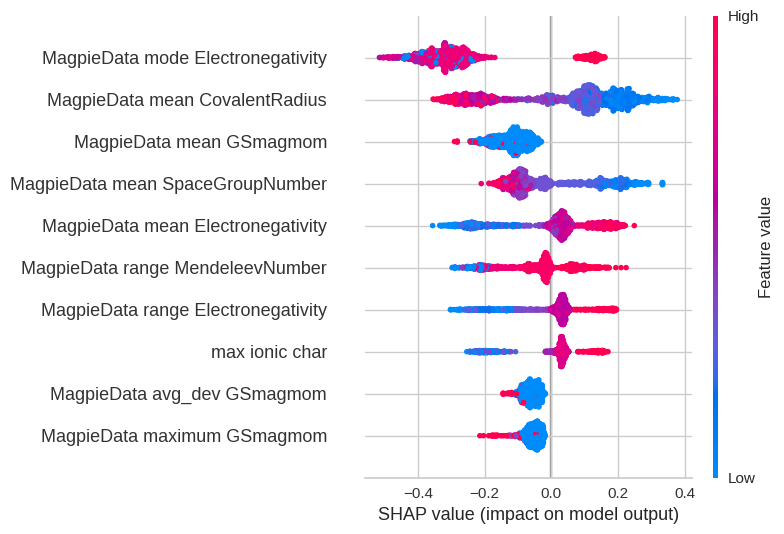

In [13]:
shap_values_xgboost = shap.TreeExplainer(xgboost_model).shap_values(X_scaled)
shap.summary_plot(shap_values_xgboost, X_scaled, max_display=10)